# ML Models for Bankruptcy Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_excel("/Users/raghuramjupudi/Library/CloudStorage/OneDrive-St.LawrenceCollege/3rd Sem/Financial Analytics/Project/Bankruptcy_data(1)(1).xlsx")

# Exploratory Data Analysis

**Basic Checks**

In [3]:
df

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


In [4]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [6]:
#Checking for null values
df.isnull().values.any()

True

The above output shows that there some missing values in the data. We will address this further

In [7]:
#count of null values
df.isnull().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [8]:
df['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

The dataset output indicates a significant imbalance, with 92,314 instances marked as non-bankrupt and only 558 instances marked as bankrupt. This imbalance can potentially bias machine learning models towards predicting the majority class. To address this, techniques like oversampling, undersampling, or adjusting class weights during model training should be considered. The choice of evaluation metrics is crucial, favoring those that account for precision and recall to provide a more comprehensive assessment of model performance in imbalanced datasets. Successfully mitigating class imbalance is essential for developing a robust predictive model that accurately identifies both bankrupt and non-bankrupt cases, ensuring meaningful insights and reliable predictions.

**Descriptive statistics for the data**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


In [5]:
corr_mat = df.corr()
corr_mat

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
EPS,1.000000,-0.000129,-0.000282,-0.000212,0.000025,0.000971,-0.000226,0.248225,0.000107,0.000079,0.000073,0.000179,-0.007229
Liquidity,-0.000129,1.000000,0.470622,0.226976,0.000147,-0.035377,0.004070,0.582335,0.001464,0.000499,0.000256,0.000829,0.001193
Profitability,-0.000282,0.470622,1.000000,0.434535,0.000280,-0.039318,0.019111,0.106389,-0.003982,0.000877,0.000469,0.001376,0.002454
Productivity,-0.000212,0.226976,0.434535,1.000000,0.000225,-0.021524,0.085273,0.001009,0.006186,0.000495,0.000300,0.001074,0.001346
Leverage Ratio,0.000025,0.000147,0.000280,0.000225,1.000000,-0.001203,0.000293,-0.000012,0.030031,-0.000093,0.000098,-0.000062,-0.000148
Asset Turnover,0.000971,-0.035377,-0.039318,-0.021524,-0.001203,1.000000,0.018420,-0.005039,-0.006375,-0.004082,-0.000050,-0.003182,0.015191
Operational Margin,-0.000226,0.004070,0.019111,0.085273,0.000293,0.018420,1.000000,0.002026,0.007173,-0.001166,0.000397,0.000092,0.001756
Return on Equity,0.248225,0.582335,0.106389,0.001009,-0.000012,-0.005039,0.002026,1.000000,0.000082,0.000111,0.000061,0.000155,-0.006530
Market Book Ratio,0.000107,0.001464,-0.003982,0.006186,0.030031,-0.006375,0.007173,0.000082,1.000000,-0.000682,-0.000928,0.000175,-0.000882
Assets Growth,0.000079,0.000499,0.000877,0.000495,-0.000093,-0.004082,-0.001166,0.000111,-0.000682,1.000000,0.073809,0.012894,-0.001393


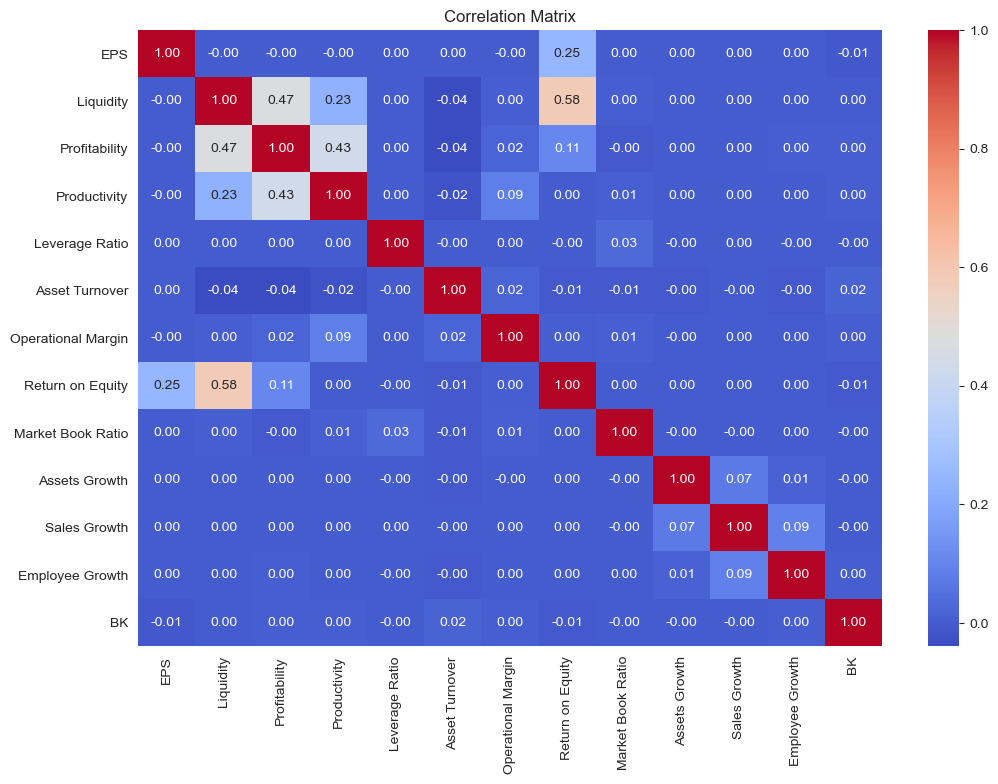

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

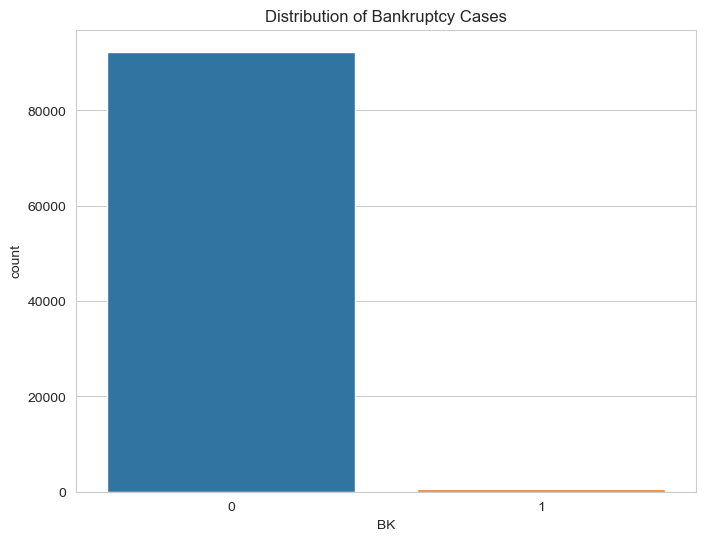

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BK', data=df)
plt.title("Distribution of Bankruptcy Cases")
plt.show()

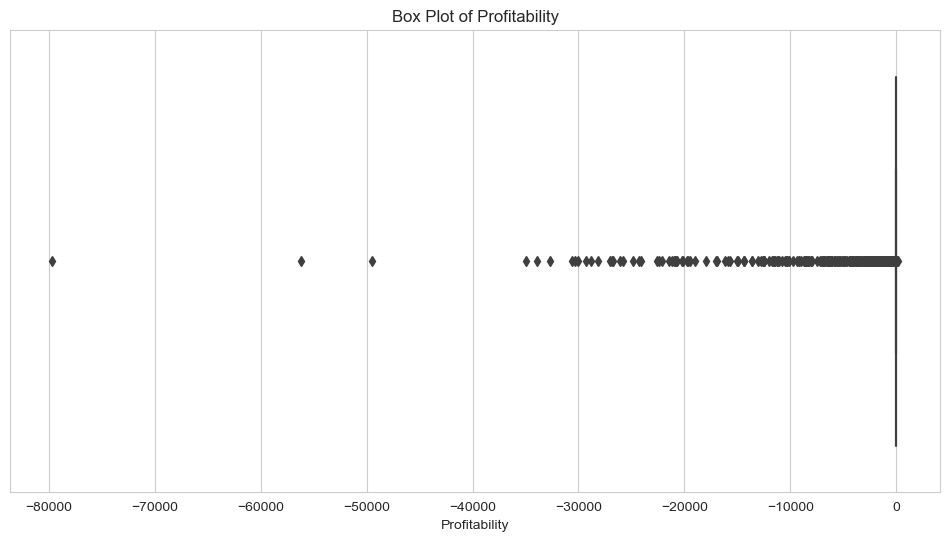

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Profitability'])
plt.title("Box Plot of Profitability")
plt.show()

**Visualising the outliers**

/Users/raghuramjupudi/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


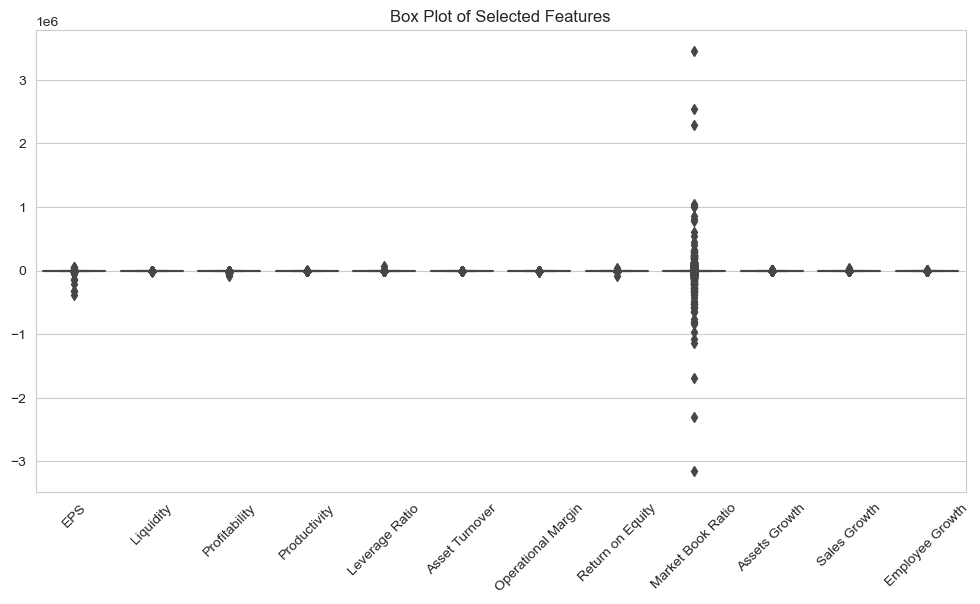

In [26]:


columns_to_check = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
                   'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth',
                   'Employee Growth']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_check])
plt.title("Box Plot of Selected Features")
plt.xticks(rotation=45)  
plt.show()

**Number of outliers in each column**

In [7]:

def count_outliers(df1, features):
    outlier_counts = {}

    for c in features:
        # 1st quartile (25%)
        Q1 = df1[c].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df1[c].quantile(0.75)
        # IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Count of outliers
        count = df1[(df1[c] < Q1 - outlier_step) | (df1[c] > Q3 + outlier_step)].shape[0]
        outlier_counts[c] = count

    return outlier_counts

# Columns to check for outliers
columns_to_check = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
                   'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth',
                   'Employee Growth']

# Count outliers in each column
outlier_counts = count_outliers(df, columns_to_check)
outlier_counts


{'EPS': 8396,
 'Liquidity': 4467,
 'Profitability': 14150,
 'Productivity': 13229,
 'Leverage Ratio': 10342,
 'Asset Turnover': 3706,
 'Operational Margin': 15577,
 'Return on Equity': 13064,
 'Market Book Ratio': 15997,
 'Assets Growth': 11995,
 'Sales Growth': 12436,
 'Employee Growth': 12673}

To deal with the outliers we can do Winsorizing. It involves capping the extreme values at a certain percentile. It's less aggressive than trimming and retains the overall structure of the data.

In [8]:


def winsorize_outliers(df2, features):
    for c in features:
        df2[c] = winsorize(df2[c], limits=[0.05, 0.05])
    return df2

# Winsorizing outliers
data_winsorized = winsorize_outliers(df.copy(), columns_to_check)


In [9]:
data_winsorized

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-0.750000,0.174115,-0.326823,-0.950000,-1.846719,-0.073287,-0.394352,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-0.750000,0.215844,-0.561155,-0.950000,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,2194.660000,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


**Replace all the missing values in each column with the median value**

In [10]:
data_filled = data_winsorized.fillna(data_winsorized.median())

In [11]:
data_filled.isnull().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [12]:
main_df = data_filled

In [13]:
X = main_df.drop('BK', axis=1)
y = main_df['BK']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


(array([73851.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   446.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

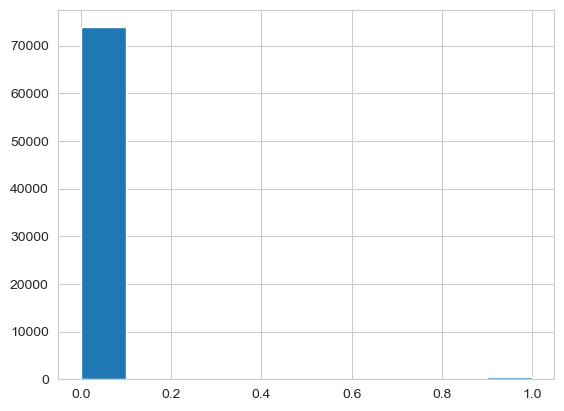

In [35]:
plt.hist(y_train)

(array([73851.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 73851.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

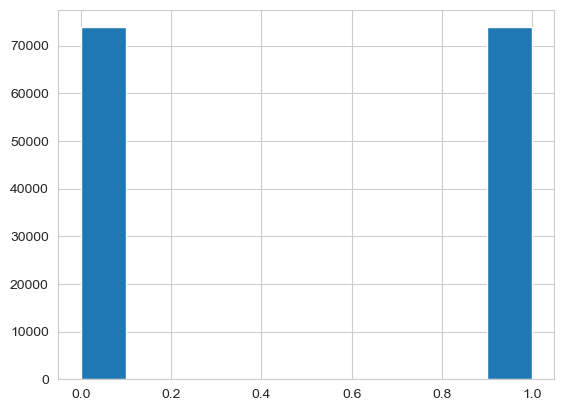

In [36]:
plt.hist(y_train_balanced)

**Logistic Regression Model**

In [40]:

log_reg = LogisticRegression()

log_reg.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = log_reg.predict(X_test)


In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[15757  2706]
 [   33    79]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     18463
           1       0.03      0.71      0.05       112

    accuracy                           0.85     18575
   macro avg       0.51      0.78      0.49     18575
weighted avg       0.99      0.85      0.91     18575



**Random Forest Classifier Model**

In [14]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)


In [15]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[18305   158]
 [  101    11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18463
           1       0.07      0.10      0.08       112

    accuracy                           0.99     18575
   macro avg       0.53      0.54      0.54     18575
weighted avg       0.99      0.99      0.99     18575



**Grid Search**

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30],        # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

In [17]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_ )

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/raghuramjupudi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/raghuramjupudi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raghuramjupudi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/raghuramjupudi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate

Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9935613600357477


In [19]:
print("Best Parameters: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_ )

Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9935613600357477
